# Описание проекта

Маркетинговая аналитика Яндекс.Афиши.

Цель: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Исходные данные - данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:

   * лог сервера с данными о посещениях сайта Яндекс.Афиши,
   * выгрузка всех заказов за этот период,
   * статистика рекламных расходов.
    
Предстоит изучить:
   * как клиенты пользуются сервисом,
   * когда делают первые покупки на сайте,
   * сколько денег приносит компании каждый клиент,
   * когда расходы на привлечение клиента окупаются.
    
Выручка измеряется в условных единицах — у.е.

## Шаг 1. Загрузка данных и подготовка их к анализу

### Загрузка данных и изучение информации

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

server_path = 'C:/Users/Admin/Documents/project datasets/visits_log.csv'
filename = 'visits_log.csv'


try:
    visits = pd.read_csv(server_path) 
except: 
    visits = pd.read_csv(filename)
    

visits.info()
print()
print(visits.describe())
display(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

           Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [4]:
server_path = 'C:/Users/Admin/Documents/project datasets/orders_log.csv'
filename = 'orders_log.csv'


try:
    orders = pd.read_csv(server_path) 
except: 
    orders = pd.read_csv(filename)
    

orders.info()
print()
print(orders.describe())
display(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [5]:
server_path = 'C:/Users/Admin/Documents/project datasets/costs.csv'
filename = 'costs.csv'


try:
    costs = pd.read_csv(server_path) 
except: 
    costs = pd.read_csv(filename)


costs.info()
print()
print(costs.describe())
display(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


Загрузили данные трех таблиц визитов, заказов и расходов и назвали их соответственно visits, orders, costs.
    
В таблицах отсутствуют пропуски, но замечены некорректные типы данных, а именно в датах (тип данных object необходимо заменить на datetime). 
    
Таблицу visits необходимо привести к единому регистру.

### Подготовка данных

In [6]:
print(visits['Device'].value_counts()) 

desktop    262567
touch       96833
Name: Device, dtype: int64


Итого 2 категории устройств пользователей:

   * настольное устройство, например, компьютер

   * сенсорное устройство, например, смартфон, планшет

In [7]:
#переименуем столбцы
visits.set_axis(['device', 'end', 'source_id', 'start', 'uid'], axis = 'columns', inplace = True)
orders.set_axis(['buy', 'revenue', 'uid'], axis = 'columns', inplace = True)

In [8]:
visits.head()

,device,end,source_id,start,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [9]:
print(visits['source_id'].value_counts())

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64


Итого 9 источников трафика

In [10]:
orders.head()

,buy,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
visits['end'] = pd.to_datetime(visits['end'])
visits['start'] = pd.to_datetime(visits['start'])
orders['buy'] = pd.to_datetime(orders['buy'])
visits['device']=visits['device'].astype('category')

In [12]:
visits.info()
print()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end        359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start      359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy      50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Проверим таблицы на наличие дубликатов.

In [13]:
visits.duplicated().sum()

0

In [14]:
orders.duplicated().sum()

0

In [15]:
costs.duplicated().sum()

0

Проверим диапазон данных, нам необходим промежуток с июня 2017 по конец мая 2018 года.

In [16]:
print(visits['start'].min())
print(visits['start'].max())
print('-----')
print(visits['end'].min())
print(visits['end'].max())

2017-06-01 00:01:00
2018-05-31 23:59:00
-----
2017-06-01 00:02:00
2018-06-01 01:26:00


In [17]:
print(orders['buy'].min())
print(orders['buy'].max())

2017-06-01 00:10:00
2018-06-01 00:02:00


In [18]:
print(costs['dt'].min())
print(costs['dt'].max())

2017-06-01
2018-05-31


In [19]:
visits=visits[visits['end'] <= '2018-05-31']
orders=orders[orders['buy'] <= '2018-05-31']

Переименовав наименования столбцов в таблицах с визитами и заказами, привели тем самым и к единому нижнему регистру все столбцы. Изменили типы данных в датах на корректный. Дубликатов не обнаружено. Диапазон данных был предоставлен немного больше необходимого, отсекли ненужную часть, оставили данные входящие в промежуток с июня 2017 по конец мая 2018 года.
По предварительной оценке пользователей видно, что они на значительное количество больше предпочитают 4 идентификатор источника перехода на сайт и устройства типа desktop, возможно это связано с багами в мобильном приложении или неудостве его использования .
    
Теперь таблицы готовы к дальнейшему анализу.

## Шаг 2. Рассчет метрик и построение графиков

Посчитаем метрики трёх видов:

   * продуктовые,
   * метрики электронной коммерции,
   * маркетинговые.
   
Отобразим на графиках изменения каждой метрики во времени. 

### Продуктовые метрики

#### Рассчитаем сколько людей пользуются сайтом в день, неделю, месяц

In [20]:
visits['start_year']  = visits['start'].dt.year
visits['start_month'] = visits['start'].dt.month
visits['start_week']  = visits['start'].dt.week
visits['start_date'] = visits['start'].dt.date
visits['start_day'] = visits['start'].dt.day
visits.head()

<ipython-input-20-4efeece0e1d1>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['start_week']  = visits['start'].dt.week


,device,end,source_id,start,uid,start_year,start_month,start_week,start_date,start_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,1
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,27


DAU  — количество уникальных пользователей в день

WAU  — количество уникальных пользователей в неделю

MAU  — количество уникальных пользователей в месяц

In [21]:
dau = visits.groupby('start_date').agg({'uid': 'nunique'}).sort_values(by='start_date').reset_index()
wau = visits.groupby(['start_year', 'start_week']).agg({'uid': 'nunique'}).sort_values(by='start_week').reset_index()
mau = visits.groupby(['start_year', 'start_month']).agg({'uid': 'nunique'}).sort_values(by='start_month').reset_index()

In [22]:
print('Количество уникальных пользователей в день в среднем -', int(dau['uid'].mean()))
print('Медианное количество уникальных пользователей в день -', int(dau['uid'].median()))

Количество уникальных пользователей в день в среднем - 904
Медианное количество уникальных пользователей в день - 919


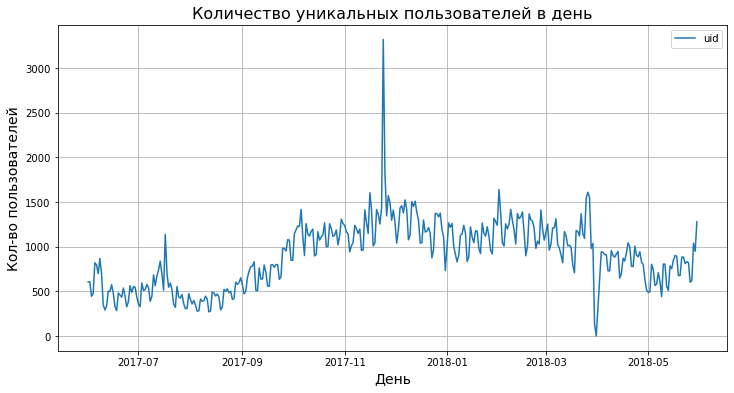

In [23]:
dau.plot(x = 'start_date', y='uid', grid=True, figsize=(12, 6))
plt.xlabel('День', fontsize=14)
plt.ylabel('Кол-во пользователей', fontsize=14)
plt.title('Количество уникальных пользователей в день', fontsize=16)
plt.show()

По графику сразу бросается в глаза, что был скачек посещаемости сайта в ноябре 2017 года и резкий спад в конце марта 2017 года.
С августа 2017 года количество посетелей постепенно рослодо декабря. В январе немного посещаемость упала, но не критично. С апреля 2018 года посещаемость начала падать с 1000-1500 посетитиелй в день до 500-1000.
Можно сделать вывод, что в целом количество уникальных постителей с лета 2017 года позросло в 2-3 раза. Самый пик посещаемости пришелся на ноябрь-декабрь месяцы.

In [24]:
print('Среднее количество уникальных пользователей в неделю -', int(wau['uid'].mean()))
print('Медианное количество уникальных пользователей в неделю -', int(wau['uid'].median()))

Среднее количество уникальных пользователей в неделю - 5682
Медианное количество уникальных пользователей в неделю - 5740


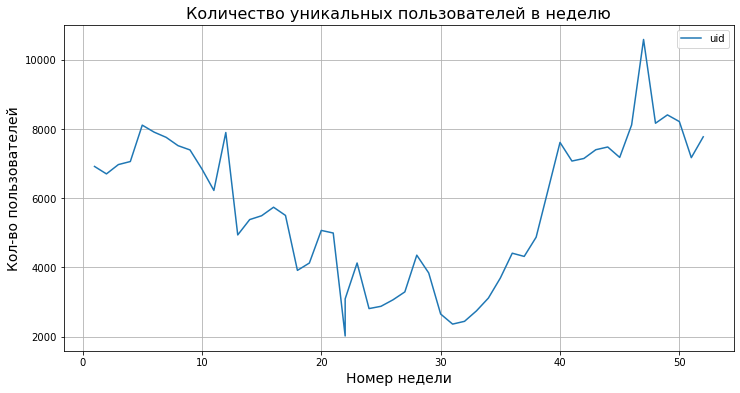

In [25]:
wau.plot(x = 'start_week', y='uid', grid=True, figsize=(12, 6))
plt.xlabel('Номер недели', fontsize=14)
plt.ylabel('Кол-во пользователей', fontsize=14)
plt.title('Количество уникальных пользователей в неделю', fontsize=16)
plt.show()

На 10 неделе начался спад посещаемости сайта и длился он до 30 недели. Далее резкий подъем по посещаемости, самый пик на 46-47 неделях - более 10000 пользователей.

In [26]:
print('Среднее количество уникальных пользователей в месяц -', int(mau['uid'].mean()))
print('Медианное количество уникальных пользователей в месяц -', int(mau['uid'].median()))

Среднее количество уникальных пользователей в месяц - 23088
Медианное количество уникальных пользователей в месяц - 24240


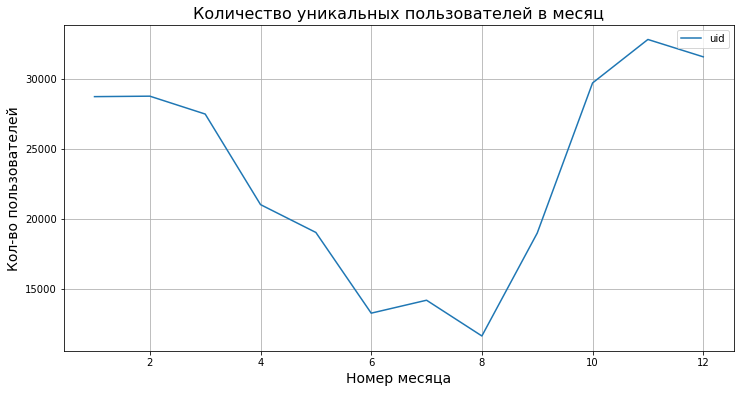

In [27]:
mau.plot(x = 'start_month', y='uid', grid=True, figsize=(12, 6))
plt.xlabel('Номер месяца', fontsize=14)
plt.ylabel('Кол-во пользователей', fontsize=14)
plt.title('Количество уникальных пользователей в месяц', fontsize=16)
plt.show()

Таким образом, исходя из графика мы видим, что летом посещаемость сайта меньше в 3-4 раза по сравнению с зимними месяцами.

Среднее количество людей, пользующихся сайтом:
    
   * в день - 907-921
   * в неделю - 5716-5740
   * в месяц - 23228-24240

Месяцы 6-8 были малопосещаемые, посещаемость составила менее 15 000 пользователей. Максимальная активность пришлась на 11 месяц, свыше 30 000 пользователей.    

#### Сколько раз за день пользователи в среднем заходят на сайт

In [28]:
#посчитаем общее количество сессий и уникальных пользователей в день 
total_sessions = visits.groupby('start_date').agg({'uid': ['count', 'nunique']}).reset_index()
total_sessions.columns = ['start_date', 'total_sessions', 'uid']
total_sessions.head()

,start_date,total_sessions,uid
0,2017-06-01,664,605
1,2017-06-02,658,608
2,2017-06-03,477,445
3,2017-06-04,510,476
4,2017-06-05,893,820


In [29]:
# посчитаем сколько раз в день в среднем заходит пользователь на сайт
total_sessions['sessions_day'] = (total_sessions['total_sessions'] / total_sessions['uid'])
total_sessions.head()

,start_date,total_sessions,uid,sessions_day
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024


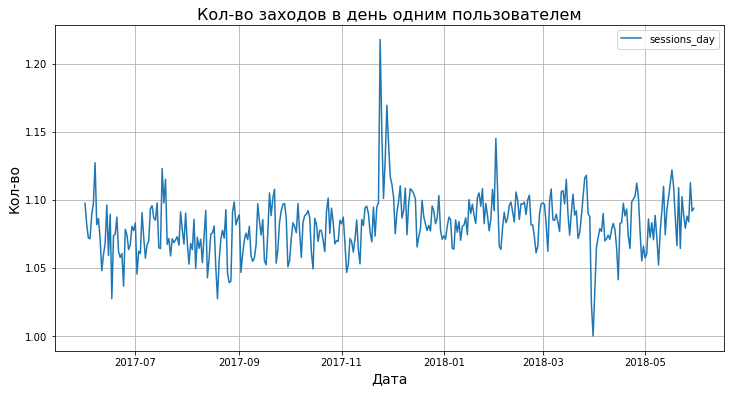

In [30]:
total_sessions.plot(x = 'start_date', y='sessions_day', grid=True, figsize=(12, 6))
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Кол-во', fontsize=14)
plt.title('Кол-во заходов в день одним пользователем', fontsize=16)
plt.show()


В среднем пользователи заходят на сайт 1 раз в день.    

#### Сколько времени пользователи проводят на сайте. Какая типичная продолжительность пользовательской сессии за весь период. 

In [31]:
#продолжительность сеанса
visits['session_duration'] = (visits['end'] - visits['start']).dt.seconds 
visits.head()

,device,end,source_id,start,uid,start_year,start_month,start_week,start_date,start_day,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,1,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,27,0


In [32]:
visits['session_duration'].describe()

count    357133.000000
mean        642.854483
std        1015.913281
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

In [33]:
visits=visits[visits['session_duration'] > 0]
visits['session_duration'].describe()

count    321536.000000
mean        714.024402
std        1046.672672
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: session_duration, dtype: float64

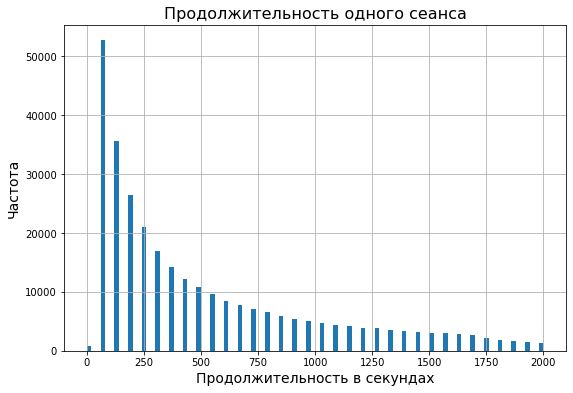

In [34]:
ax=visits['session_duration'].hist(bins=100, range=(0,2000), figsize = (9,6))
ax.set_title('Продолжительность одного сеанса', fontsize=16)
ax.set_xlabel('Продолжительность в секундах', fontsize=14)
ax.set_ylabel('Частота', fontsize=14)
plt.show()

In [35]:
print('Мода сеанса - ', visits['session_duration'].mode()[0]) 

Мода сеанса -  60


На графике представлено геометрическое распределение, исходя из этого большее внимание обратим на моду. 
То есть типичная продолжительность проведенного времени пользователями на сайте - 60 секунд  

#### Коэффициент удержания пользователей. Рассмотрим средний коэффициент на второй месяц «жизни» когорт

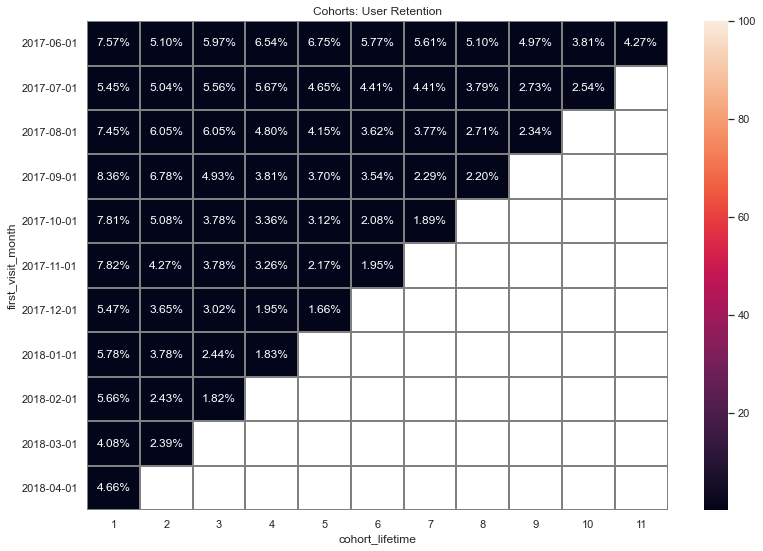

In [36]:
#найдем даты первых посещений сайта
first_visit = visits.groupby(['uid'])['start'].min()
first_visit.name = 'first_visit'
visits = visits.join(first_visit, on='uid')


#выделим месяцы из дат первого визита и всех визитов
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['month'] = visits['start'].astype('datetime64[M]')

visits['cohort_lifetime'] = (
    visits['month'] - visits['first_visit_month']
)
visits['cohort_lifetime'] = visits[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(
    'int'
)


#Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_visit_month', 'uid']
]

initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

cohorts = cohorts.merge(initial_users_count,on='first_visit_month')

cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
#уберем 0 лайфтайм из данных
cohorts=cohorts[cohorts['cohort_lifetime']>0]


cohorts['first_visit_month'] = cohorts['first_visit_month'].astype('datetime64[M]')


retention_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)



sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
ax=sns.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='gray', vmax=100)
ax.set_yticklabels(retention_pivot.index.date);




Маленький проуент удержания клиентов, который снижается с течением времени.

In [37]:
#средний коэффициент на второй месяц «жизни» когорт
mean_k = cohorts[cohorts['cohort_lifetime'] == 1]
print(mean_k)
print()
print('Средний коэффициент во 2 когорте -', cohorts['retention'].mean())

   first_visit_month  cohort_lifetime   uid  cohort_users  retention
1         2017-06-01                1   900         11885   0.075726
13        2017-07-01                1   645         11825   0.054545
24        2017-08-01                1   686          9214   0.074452
34        2017-09-01                1  1264         15125   0.083570
43        2017-10-01                1  1839         23538   0.078129
51        2017-11-01                1  1943         24852   0.078183
58        2017-12-01                1  1259         23030   0.054668
64        2018-01-01                1  1189         20573   0.057794
69        2018-02-01                1  1141         20173   0.056561
73        2018-03-01                1   766         18793   0.040760
76        2018-04-01                1   662         14215   0.046571

Средний коэффициент во 2 когорте - 0.042912009182650104


In [38]:
retention_pivot.head()

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,
2017-06-01,0.075726,0.050989,0.059739,0.065377,0.067480,0.057720,0.056121,0.050989,0.049727,0.038115,0.042659
2017-07-01,0.054545,0.050402,0.055645,0.056660,0.046512,0.044059,0.044059,0.037886,0.027315,0.025370,NaN
2017-08-01,0.074452,0.060451,0.060451,0.047970,0.041459,0.036249,0.037660,0.027133,0.023443,NaN,NaN
2017-09-01,0.083570,0.067769,0.049322,0.038083,0.036959,0.035372,0.022876,0.021950,NaN,NaN,NaN
2017-10-01,0.078129,0.050811,0.037811,0.033648,0.031184,0.020775,0.018906,NaN,NaN,NaN,NaN


In [39]:
retention_pivot[1].mean()

0.06372348230411469

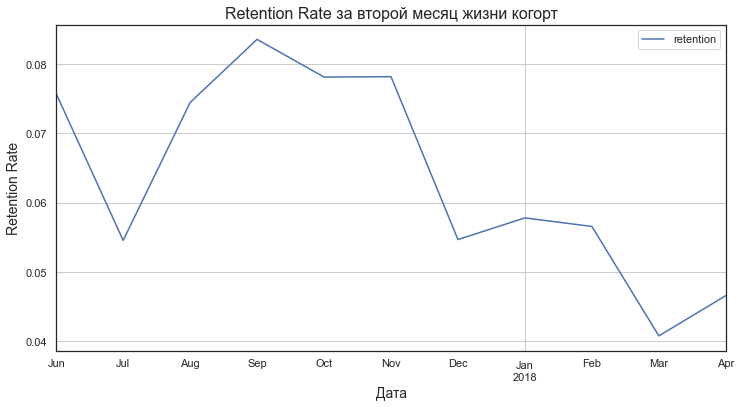

In [40]:
mean_k.plot(x = 'first_visit_month', y='retention', grid=True, figsize=(12, 6))
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Retention Rate', fontsize=14)
plt.title('Retention Rate за второй месяц жизни когорт', fontsize=16)
plt.show()

Очень маленький процент удержания клиентов.  В целом с течением времени процент уменьшается, хотя в январе замечен скачек, но после него резкий спад.
Средний коэффициент за второй месяц жизни когорты - 0.047    
    

### Метрики электронной коммерции

#### Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

In [41]:
first_visits = visits.groupby('uid')['start'].min().reset_index()

first_visits

,uid,start
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
205722,18446316582013423015,2018-02-26 10:14:00
205723,18446403737806311543,2017-11-30 03:36:00
205724,18446556406699109058,2018-01-01 16:29:00
205725,18446621818809592527,2017-12-27 13:27:00


In [42]:
first_orders = orders.groupby('uid')['buy'].min().reset_index()

first_orders

,uid,buy
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36025,18445147675727495770,2017-11-24 09:03:00
36026,18445407535914413204,2017-09-22 23:55:00
36027,18445601152732270159,2018-03-26 22:54:00
36028,18446156210226471712,2018-02-18 19:34:00


In [43]:
time = first_visits.merge(first_orders, on='uid')
time

,uid,start,buy
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
35589,18442290965339407211,2018-02-05 19:35:00,2018-02-05 19:39:00
35590,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00
35591,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00
35592,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00


In [44]:
time['time_first_orders'] = (time['buy'] - time['start']).dt.seconds/60

time

,uid,start,buy,time_first_orders
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,1382.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79.0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0
...,...,...,...,...
35589,18442290965339407211,2018-02-05 19:35:00,2018-02-05 19:39:00,4.0
35590,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,7.0
35591,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,663.0
35592,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,573.0


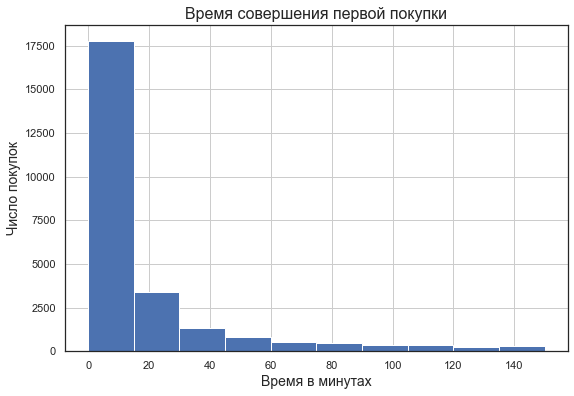

In [45]:
ax = time['time_first_orders'].hist(bins=10, range=(0, 150), figsize = (9,6))
ax.set_title('Время совершения первой покупки', fontsize=16)
ax.set_xlabel('Время в минутах', fontsize=14)
ax.set_ylabel('Число покупок', fontsize=14)
plt.show()

In [46]:
print('Медианное время совершения первой покупки', time['time_first_orders'].median(), 'минут')
print()
print('Минимальное время совершения первой покупки', time['time_first_orders'].min(), 'минут')
print('Максимальное время совершения первой покупки', time['time_first_orders'].max(), 'минут')

Медианное время совершения первой покупки 15.0 минут

Минимальное время совершения первой покупки 0.0 минут
Максимальное время совершения первой покупки 1439.0 минут


    
В среднем с момента первого посещения сайта до совершения покупки - 15 минут.
15 минут - медиана графика, исходя из его исходного вида, лучше выбрать именно медианный показатель.
Для подтверждения этого вывели минимальное и максимальное значение, которые значительно разнятся, и, если рассматривать не медиану, а среднее, погрешность будет большая, что приведет к ошибке в данных. 

#### Рассчитаем среднее количество покупок на одного покупателя за определённый период за 6 месяцев

In [47]:
orders['orders_month'] = orders['buy'].dt.month
orders['orders_year'] = orders['buy'].dt.year
print(orders['orders_month'].value_counts())
print()
orders['orders_year'].value_counts()

12    6218
10    5679
11    5659
3     5326
2     5281
1     4721
5     3736
9     3387
4     3273
7     2363
6     2354
8     1807
Name: orders_month, dtype: int64



2017    27467
2018    22337
Name: orders_year, dtype: int64

In [48]:
#срез данных за 6 месяцев в 2017 году
orders_6m = orders[(orders['orders_month'] > 6) & (orders['orders_year'] == 2017)]
orders_6m

,buy,revenue,uid,orders_month,orders_year
2354,2017-07-01 00:02:00,8.55,15267325101663366816,7,2017
2355,2017-07-01 02:06:00,4.89,4840588161370404111,7,2017
2356,2017-07-01 05:59:00,18.33,6645567837166442471,7,2017
2357,2017-07-01 06:46:00,1.59,13767433222793079515,7,2017
2358,2017-07-01 07:51:00,2.44,2576016302716544399,7,2017
...,...,...,...,...,...
27462,2017-12-31 23:00:00,5.50,18253446218020150082,12,2017
27463,2017-12-31 23:17:00,3.67,2919141490251993368,12,2017
27464,2017-12-31 23:24:00,7.64,9177712195273273513,12,2017
27465,2017-12-31 23:33:00,4.58,9248100808410493587,12,2017


In [49]:
#среднее кол-во покупок
orders_6m = orders_6m.groupby('uid')['buy'].count()
print('среднее кол-во покупок на одного покупателя - ', orders_6m.mean())

среднее кол-во покупок на одного покупателя -  1.3278870558375635


   
В среднем один покупатель с 07.2017-12.2017 совершил 1 покупку   

#### Рассчитаем средний чек покупки

In [50]:
orders_chek = orders.groupby('orders_month')['revenue'].mean()
orders_chek.columns = ['month', 'revenue_mean'] 

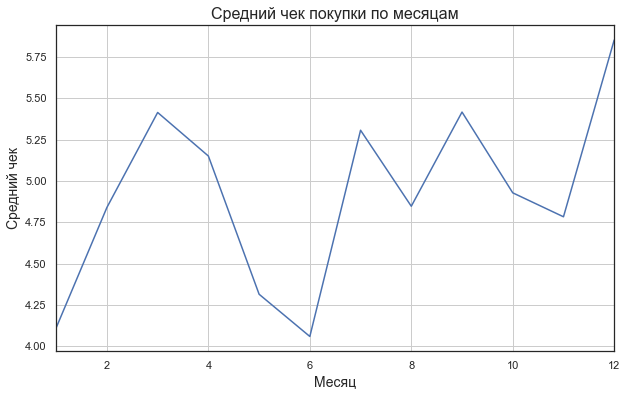

In [51]:
orders_chek.plot(x='month', xlim=(1, 12), grid=True, figsize=(10, 6))
plt.xlabel('Месяц',fontsize=14)
plt.ylabel('Средний чек',fontsize=14) 
plt.title('Средний чек покупки по месяцам', fontsize=16)
plt.show()

Исходя из графика видим, что минимальные чеки в январе, июне. Максимальные в марте, июле, сентябре и декабре.

In [52]:
print('Средний чек покупки - ', orders_chek.mean(), 'y.e.')

Средний чек покупки -  4.918928522025272 y.e.


   
Средний чек покупки составил 4.9. 
    
При этом видно, что средний размер чека в 6 месяце был меньше всего, около 4. В другие месяцы  средняя сумма чека составляла в промежутке от 4.75-5.5, а в 12 месяце был скачек - более 5.75.  

#### Как меняется LTV на покупателя по когортам.  Средний LTV по когортам за 6 месяцев, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%

LTV  —  итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок. 

In [53]:
orders['buy'].describe() 

<ipython-input-53-a8daca20bf94>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['buy'].describe()


count                   49804
unique                  45576
top       2017-11-24 17:42:00
freq                        8
first     2017-06-01 00:10:00
last      2018-05-30 23:59:00
Name: buy, dtype: object

Первая покупка состоялась 1 июня 2017 года. Последняя — 30 мая 2018 года.

In [54]:
orders['order_month'] = orders['buy'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]') 

In [55]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
print(first_orders.head()) 

                uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01


In [56]:
#Посчитаем количество новых покупателей (n_buyers) за каждый месяц
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes.head()) 

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


In [57]:
orders_new = pd.merge(orders,first_orders, on='uid')
print(orders_new.head()) 

                  buy  revenue                   uid  orders_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494             6   
1 2017-06-01 00:25:00     0.55  11627257723692907447             6   
2 2017-06-01 00:27:00     0.37  17903680561304213844             6   
3 2017-06-01 00:29:00     0.55  16109239769442553005             6   
4 2017-06-01 07:58:00     0.37  14200605875248379450             6   

   orders_year order_month first_order_month  
0         2017  2017-06-01        2017-06-01  
1         2017  2017-06-01        2017-06-01  
2         2017  2017-06-01        2017-06-01  
3         2017  2017-06-01        2017-06-01  
4         2017  2017-06-01        2017-06-01  


In [58]:
#Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку
cohorts = (
    orders_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
print(cohorts.head()) 

  first_order_month order_month  revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34
3        2017-06-01  2017-09-01  1931.30
4        2017-06-01  2017-10-01  2068.58


In [59]:
#сколько людей первый раз совершили покупку в каждый месяц (n_buyers)
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
print(report.head()) 

  first_order_month  n_buyers order_month  revenue
0        2017-06-01      2023  2017-06-01  9557.49
1        2017-06-01      2023  2017-07-01   981.82
2        2017-06-01      2023  2017-08-01   885.34
3        2017-06-01      2023  2017-09-01  1931.30
4        2017-06-01      2023  2017-10-01  2068.58


In [60]:
#валовая прибыль
report['gp'] = report['revenue']

#возраст когорт
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')

report['age'] = report['age'].round().astype('int')

print(report.head())

  first_order_month  n_buyers order_month  revenue       gp  age
0        2017-06-01      2023  2017-06-01  9557.49  9557.49    0
1        2017-06-01      2023  2017-07-01   981.82   981.82    1
2        2017-06-01      2023  2017-08-01   885.34   885.34    2
3        2017-06-01      2023  2017-09-01  1931.30  1931.30    3
4        2017-06-01      2023  2017-10-01  2068.58  2068.58    4


In [61]:
#Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте (LTV)
report['ltv'] = report['gp'] / report['n_buyers']
report


,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531
...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1063.05,1,0.300892
74,2018-03-01,3533,2018-05-01,788.24,788.24,2,0.223108
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1026.66,1026.66,1,0.451081


In [62]:
report['first_order_month'] = report['first_order_month'].astype('datetime64[M]')

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

output = output.cumsum(axis=1)

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.64738,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.870232
2017-07-01,6.010218,6.345429,6.96896,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.23118,8.373853,
2017-08-01,5.276518,5.748511,6.206993,6.59827,7.092321,7.375861,7.586526,7.991533,8.283745,8.415518,,
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.25122,13.416354,,,
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.349329,,,,
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.391382,,,,,
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.633427,,,,,,
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.934675,,,,,,,
2018-02-01,4.156987,4.435262,4.513777,4.582632,,,,,,,,


<ipython-input-63-82e462b58a54>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(output.index.date)


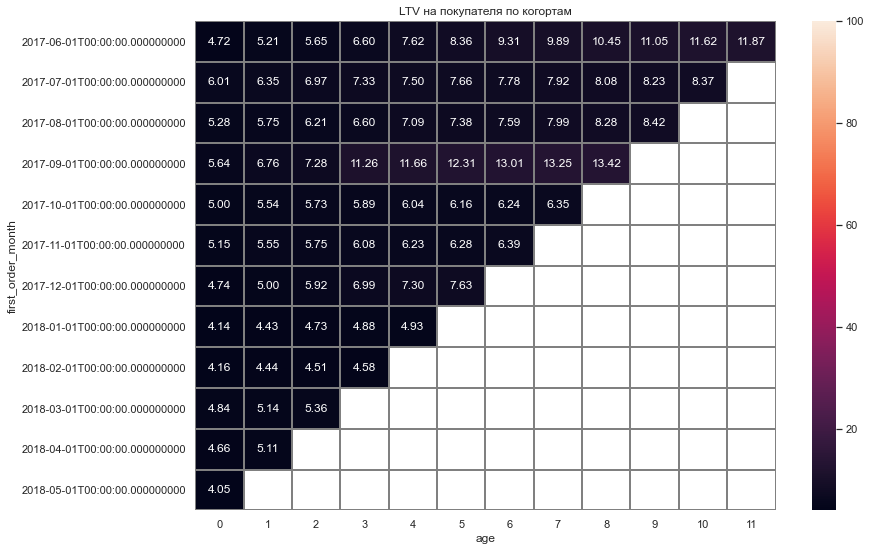

In [63]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV на покупателя по когортам')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=100)
ax.set_yticklabels(output.index.date)
plt.show()


В среднем из месяца в месяц клиенты приносят все больше средств.

Посчитаем средний ltv для когорт, проживших более 6 месяцев, за период 6 месяцев

In [64]:
#выполним срез данных
report = report[report['age']>6]
report

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
7,2017-06-01,2023,2018-01-01,1176.56,1176.56,7,0.581592
8,2017-06-01,2023,2018-02-01,1119.15,1119.15,8,0.553213
9,2017-06-01,2023,2018-03-01,1225.51,1225.51,9,0.605788
10,2017-06-01,2023,2018-04-01,1155.66,1155.66,10,0.571261
11,2017-06-01,2023,2018-05-01,501.41,501.41,11,0.247855
19,2017-07-01,1923,2018-02-01,272.72,272.72,7,0.141820
20,2017-07-01,1923,2018-03-01,310.05,310.05,8,0.161232
21,2017-07-01,1923,2018-04-01,282.96,282.96,9,0.147145
22,2017-07-01,1923,2018-05-01,274.36,274.36,10,0.142673
30,2017-08-01,1370,2018-03-01,554.86,554.86,7,0.405007


In [65]:
#проверим временной промежуток
report['first_order_month'].value_counts()

2017-06-01    5
2017-07-01    4
2017-08-01    3
2017-09-01    2
2017-10-01    1
Name: first_order_month, dtype: int64

In [66]:
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

output.fillna('') 

age,7,8,9,10,11
first_order_month,,,,,
2017-06-01,0.581592,0.553213,0.605788,0.571261,0.247855
2017-07-01,0.141820,0.161232,0.147145,0.142673,
2017-08-01,0.405007,0.292212,0.131774,,
2017-09-01,0.243150,0.165134,,,
2017-10-01,0.104558,,,,


<ipython-input-67-f1aa246f2e17>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(output.index.date);


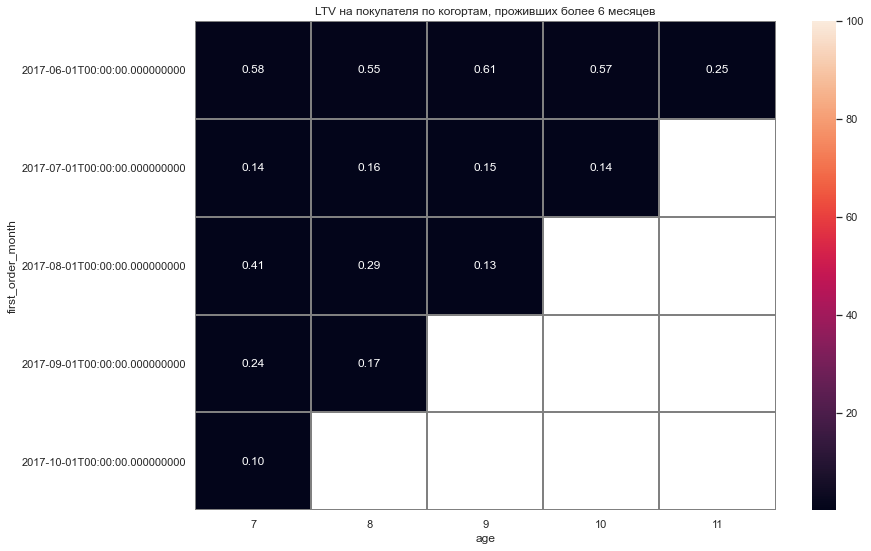

In [67]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV на покупателя по когортам, проживших более 6 месяцев')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=100)
ax.set_yticklabels(output.index.date);


За период 5 месяцев в 2017 году и когорты, просуществовавшие более 6 месяцев, видно что ltv с течением времени уменьшается

### Маркетинговые метрики

Посчитайте и отобразите на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.

#### Общая сумма расходов на маркетинг. Как траты распределены по источникам

In [68]:
#главные источники для каждого пользователя, исходя из источника первого захода на сайт
main_source = visits.groupby(['uid', 'source_id'])['start'].min().reset_index()
main_source.columns=['uid', 'source_id', 'first_date']

main_source 

,uid,source_id,first_date
0,11863502262781,3,2018-03-01 17:27:00
1,49537067089222,2,2018-02-06 15:55:00
2,297729379853735,3,2017-06-07 18:47:00
3,313578113262317,2,2017-09-18 22:49:00
4,325320750514679,5,2017-09-30 14:29:00
...,...,...,...
249520,18446316582013423015,3,2018-02-26 10:14:00
249521,18446403737806311543,5,2017-11-30 03:36:00
249522,18446556406699109058,3,2018-01-01 16:29:00
249523,18446621818809592527,4,2017-12-27 13:27:00


In [69]:
#количество первых переходов по источникам
main_source['source_id'].value_counts()

4     74707
3     66967
5     50738
2     23696
1     17805
9      8471
10     7104
7        32
6         5
Name: source_id, dtype: int64

In [70]:
print('Всего потрачено средств на маркетинг - ', costs['costs'].sum(), 'y.e.')
costs1 = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
costs1.columns=['sourse_id', 'sum_costs']
costs1

Всего потрачено средств на маркетинг -  329131.62 y.e.


,sourse_id,sum_costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


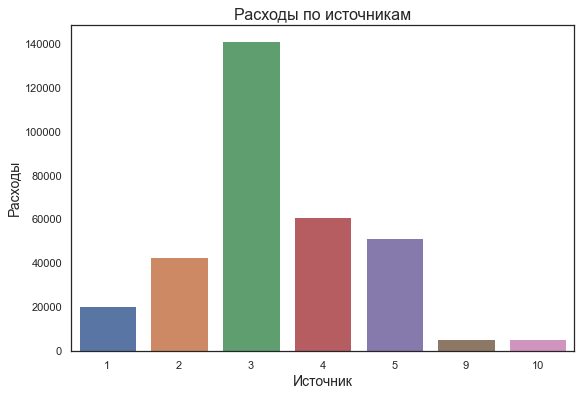

In [71]:
plt.figure(figsize = (9, 6))
ax = sns.barplot(x="sourse_id", y="sum_costs", data=costs1)
plt.title('Расходы по источникам',fontsize=16)
ax.set_xlabel('Источник',fontsize=14)
ax.set_ylabel('Расходы',fontsize=14)
plt.show()

In [72]:
total = costs.groupby('dt')['costs'].sum().reset_index()
total.columns=['dt', 'costs']
total

,dt,costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44
...,...,...
359,2018-05-27,532.87
360,2018-05-28,619.44
361,2018-05-29,784.79
362,2018-05-30,1183.00


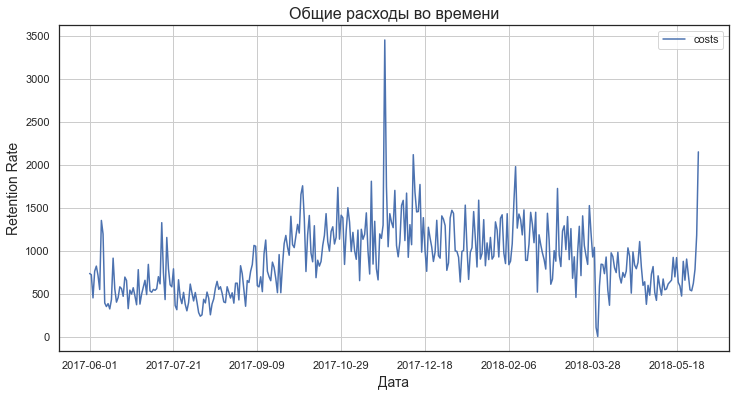

In [73]:
total.plot(x = 'dt', y='costs', grid=True, figsize=(12, 6))
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Retention Rate', fontsize=14)
plt.title('Общие расходы во времени', fontsize=16)
plt.show()

Больше всего было расходов в ноябре 2017 года, а меньше всего - в авусте 2017 года и апреле 2018 года.

####  Средний CAC на одного покупателя для всего проекта и для каждого источника трафика

CAC — стоимость привлечения клиента. Сумма денег, во сколько обходится новый клиент компании.

In [74]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'})
costs_by_source.reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [75]:
visits_by_source = visits.query('start == first_visit')
count_uid_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'uid':'nunique'})\
                        .rename(columns={'uid':'count_uid'})

count_uid_by_source.reset_index()

,source_id,count_uid
0,1,2919
1,2,3339
2,3,10137
3,4,10032
4,5,6811
5,7,1
6,9,1082
7,10,1273


In [76]:
cac = count_uid_by_source.join(costs_by_source).reset_index()
cac

,source_id,count_uid,costs
0,1,2919,20833.27
1,2,3339,42806.04
2,3,10137,141321.63
3,4,10032,61073.60
4,5,6811,51757.10
5,7,1,NaN
6,9,1082,5517.49
7,10,1273,5822.49


In [77]:
cac['cac'] = cac['costs']/cac['count_uid']
cac

,source_id,count_uid,costs,cac
0,1,2919,20833.27,7.137126
1,2,3339,42806.04,12.820018
2,3,10137,141321.63,13.941169
3,4,10032,61073.60,6.087879
4,5,6811,51757.10,7.599046
5,7,1,NaN,NaN
6,9,1082,5517.49,5.099344
7,10,1273,5822.49,4.573833


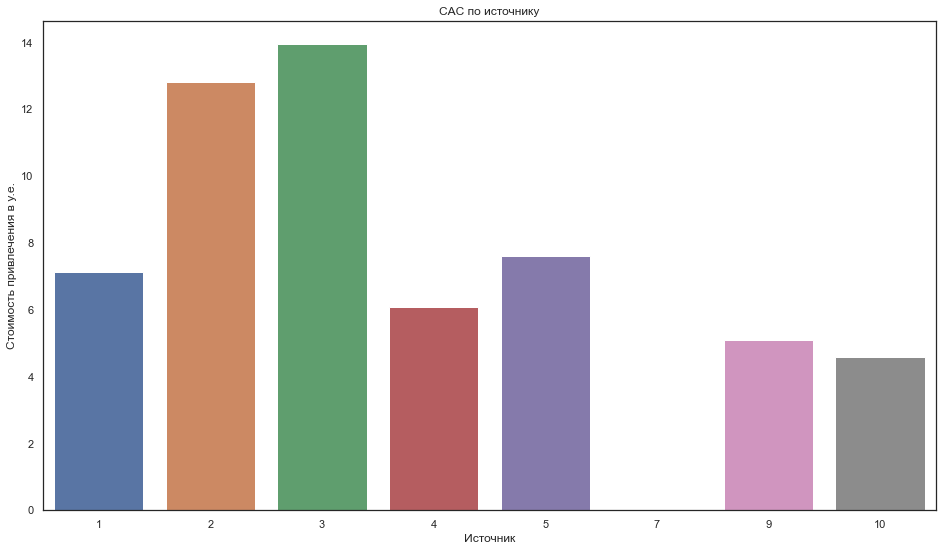

In [78]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="cac", data=cac)
plt.title('CAC по источнику')
ax.set_xlabel('Источник')
ax.set_ylabel('Стоимость привлечения в y.e.')
plt.show()

На 3 и 2 источнике больше всего расходов на привлечение пользователей. Можно сделать вывод, что это самые дорогие источники.
На 1, 4, 5, 9 источниках средние затраты, меньше всего на 10. 

In [79]:
#средний сас по источникам
cac['cac'].mean()

8.17977348623966

In [80]:
#средний cac
costs['costs'].sum() / orders['uid'].nunique()

9.134932556203164

In [81]:
# посчитаем расходы по месяцам
costs_month = costs.groupby('dt')['costs'].sum()

n_buyers = costs['source_id'].count()
cac = costs_month / n_buyers


print('CAC =', cac) 

CAC = dt
2017-06-01    0.289245
2017-06-02    0.283710
2017-06-03    0.177360
2017-06-04    0.299434
2017-06-05    0.323147
                ...   
2018-05-27    0.209626
2018-05-28    0.243682
2018-05-29    0.308729
2018-05-30    0.465382
2018-05-31    0.847246
Name: costs, Length: 364, dtype: float64


In [82]:
monthly_costs = costs.groupby('month').count().reset_index()
monthly_costs['cac'] = monthly_costs['costs']/monthly_costs['source_id']
monthly_costs.head() 

,month,source_id,dt,costs,cac
0,2017-06-01,210,210,210,1.0
1,2017-07-01,217,217,217,1.0
2,2017-08-01,217,217,217,1.0
3,2017-09-01,210,210,210,1.0
4,2017-10-01,217,217,217,1.0


In [83]:
# считаем расходы за месяц
monthly_costs = costs.groupby('month').sum().reset_index()
monthly_costs['cac'] = monthly_costs['costs']/monthly_costs['source_id']
monthly_costs.head() 

,month,source_id,costs,cac
0,2017-06-01,1020,18015.00,17.661765
1,2017-07-01,1054,18240.59,17.306063
2,2017-08-01,1054,14790.54,14.032770
3,2017-09-01,1020,24368.91,23.891088
4,2017-10-01,1054,36322.88,34.461935


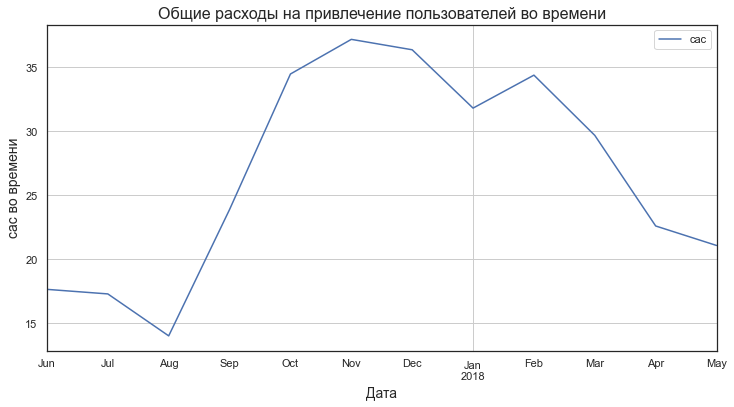

In [84]:
monthly_costs.plot(x = 'month', y='cac', grid=True, figsize=(12, 6))
plt.xlabel('Дата', fontsize=14)
plt.ylabel('cac во времени', fontsize=14)
plt.title('Общие расходы на привлечение пользователей во времени', fontsize=16)
plt.show()

Стоимость привлечения пользователей меньше всего была в августе 2017 года. После этого месяцв начался резкий подъем влоть до ноября 2017 года. Расходы увеличились более, чем на 20 y.e. С декабря 2017 года начался спад до мая 2018 года. Расходы упали более, чем на 10 y.e.

#### ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт

ROMI - возврат инвестиций в маркетинг.

In [85]:
costs_by_source.reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [86]:
revenue_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'revenue':'sum'})
revenue_by_source.reset_index()

,source_id,revenue
0,1,29894.35
1,2,45464.56
2,3,51882.91
3,4,55238.50
4,5,53026.40
5,7,1.22
6,9,5710.80
7,10,4362.25


In [87]:
roi = revenue_by_source.join(costs_by_source)
roi['roi'] = (roi['revenue'] - roi['costs']) / roi['costs']
roi

,revenue,costs,roi
source_id,,,
1,29894.35,20833.27,0.434933
2,45464.56,42806.04,0.062106
3,51882.91,141321.63,-0.632874
4,55238.50,61073.60,-0.095542
5,53026.40,51757.10,0.024524
7,1.22,NaN,NaN
9,5710.80,5517.49,0.035036
10,4362.25,5822.49,-0.250793



    
У источников 3, 4, 10 отрицательная окупаемость, следовательно с ними работать в убыток. Лучшая окупаемость у источника 1.

In [88]:
source_and_device = (orders.merge(visits_by_source, on='uid', how='inner'))\
                                .groupby(['source_id', 'device']).agg({'revenue':'sum'}).reset_index()

In [ ]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="revenue", hue="device", data=source_and_device)
plt.title('Заказы по источникам и устройствам')
ax.set_xlabel('Источник')
ax.set_ylabel('Сумма заказов')
plt.show()


Больше всего заказов произовдится на источниках 1-5. 

## Выводы и рекомендации


    
1. Проведя продуктовое исследование можно сделать вывод о том, что в целом продукт пользуется хорошим спросом, но в летний период заметен спад посещаемости сайта пользователями. Возможно по причине отпусков.  Средняя продолжительность нахождения пользователей на сайте от 1 минута - это самая типичная продолжительность сеанса. Заметен маленький процент удержания пользователей. 
    
2. В среднем пользователи тратят 15 минут до совершения первой покупки. Чаще всего пользователи совершают 1 покупку и предпочтительно в такие месяцы как март, май, сентябрь и декабрь. В эти месяцы выше чек покупок. Но в среднем за год он составляет - 4.9 y.e.
    
3. В маркетинговом исследовании увидели, что на 3 источнике больше всего затрат - 141321, далее идут 4 - 61073, 5 - 51757, 2 - 42806 источники. А на 10 - 5822 и 9 - 5517 источниках самые минимальные затраты.   
Средний CAC на одного покупателя для всего проекта - 9, средний для источников трафика - 8.


Через 3 и 4 источники было совершено больше всего первых переходов на сайт. На 1, 4, 5, 9 источниках средние затраты. Больше всего заказов произовдится на источниках 1-5. Итог сделать упор стоит на источники 1, т.к. у него самый высокий roi. 